##### 多畫面延遲播放影片
這篇教學會如何使用 OpenCV 將同一個影片，排列組合成九宮格、十六宮格、二十五宮格...等多畫面，並在多畫面中製作出延遲播放的效果。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 縮小影片尺寸，合成黑色背景 
使用 NumPy 產生全黑背景後，讀取攝影鏡頭的影像並改變影像尺寸 ( 使用變數進行設定，讓後續修改較為彈性 )，將影像放在全黑背景的左上角。

參考：讀取並播放影片、翻轉影片、改變影片尺寸

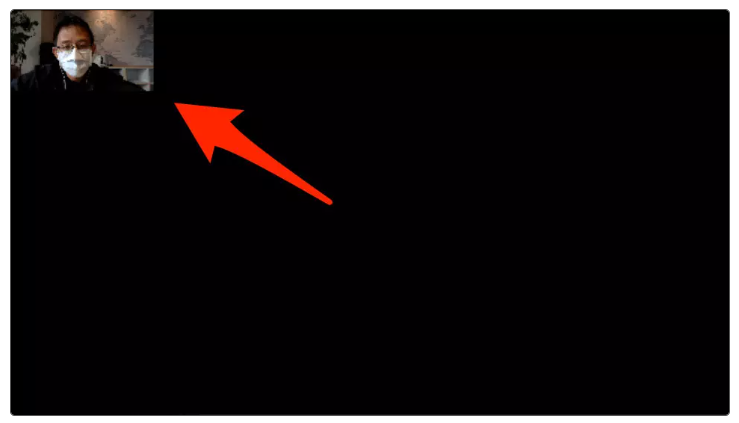

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture('1080_1920_30fps.mp4')  # 讀取攝影鏡頭
output = np.zeros((360,640,3), dtype='uint8')  # 產生 640x360 的黑色背景

if not cap.isOpened():
    print("Cannot open camera")
    exit()

n = 5                                  # 設定要分成幾格
w = 640//n                             # 計算分格之後的影像寬度 ( // 取整數 )
h = 360//n                             # 計算分格之後的影像高度 ( // 取整數 )
while True:
    ret, img = cap.read()              # 讀取影像
    img = cv2.resize(img,(w, h))       # 縮小尺寸
    output[0:h, 0:w] = img             # 將 output 的特定區域置換為 img
    cv2.imshow('oxxostudio', output)
    if cv2.waitKey(50) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

##### 影片延遲播放效果 
建立一個空串列，將攝影機取得的影像依序存入串列中，並保持串列最大長度為影像總數，由於 while 迴圈會不斷更新串列內容，\
只要每次更新時重新組合串列中的影像，就能產生延遲播放的效果。

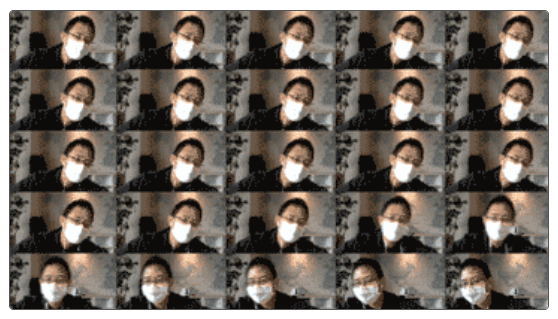

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture('4096_2160_24fps.mp4')
output = np.zeros((360,640,3), dtype='uint8')

if not cap.isOpened():
    print("Cannot open camera")
    exit()

n = 5
w = 640//n
h = 360//n
img_list = []        # 設定空串列，記錄每一格的影像
while True:
    ret, img = cap.read()
    img = cv2.resize(img,(w, h))
    img_list.append(img)                    # 每次擷取影像時，將影像存入串列
    if len(img_list)>n*n: del img_list[0]   # 如果串列長度超過可容納的影像數量，移除第一個項目
    for i in range(len(img_list)):
        x = i%n      # 根據串列計算影像的 x 座標 ( 取餘數 )
        y = i//n     # 根據串列計算影像的 y 座標 ( 取整數 )
        output[h*y:h*y+h, w*x:w*x+w] = img_list[i]  # 更新畫面

    cv2.imshow('oxxostudio', output)
    if cv2.waitKey(50) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()